#### Analysis of NYC taxi datasets - For-Hire Vehicle Trip Records: January 2021 and February 2021

In [3]:
import pandas as pd

In [8]:
# Reading January dataset

df_01 = pd.read_parquet("data/fhv_tripdata_2021-01.parquet")

df_01

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


Q1: Read the data for January. How many records are there?


Answer: 1154112

In [22]:
df_01["duration"] = df_01["dropOff_datetime"] - df_01["pickup_datetime"]

df_01["duration"] = df_01["duration"].apply(lambda td: td.total_seconds() / 60)

In [23]:
df_01["duration"].mean()

19.167224093791006

Q2: What's the average trip duration in January?

Answer: 19.16

<AxesSubplot:>

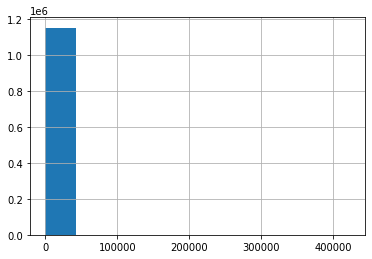

In [27]:
df_01["duration"].hist(bins=10)

In [28]:
df_01_slice = df_01.loc[(df_01["duration"] >= 1) & (df_01["duration"] <= 60)]

df_01_slice

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [29]:
df_01.shape[0] - df_01_slice.shape[0]

44286

In [32]:
df_01_slice.loc[:, ["PUlocationID", "DOlocationID"]] = df_01_slice.loc[:, ["PUlocationID", "DOlocationID"]].fillna(-1)

df_01_slice

/tmp/ipykernel_1504/1647100434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_01_slice.loc[:, ["PUlocationID", "DOlocationID"]] = df_01_slice.loc[:, ["PUlocationID", "DOlocationID"]].fillna(-1)


In [36]:
(df_01_slice["PUlocationID"] == -1).sum()/df_01_slice.shape[0]*100

83.52732770722618

Q3: What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.

Answer: 83.5%

In [37]:
df_train = df_01_slice[["PUlocationID", "DOlocationID"]].copy()

train_dict = df_train.to_dict(orient="records")

In [45]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()

X_train = dv.fit_transform(train_dict)
X_train.toarray().shape

(1109826, 2)

Q4: What's the dimensionality of this matrix?

Answer: 2

In [57]:
y_train = df_01_slice["duration"].values

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
y_train_hat = lr.predict(X_train)

In [59]:
from sklearn.metrics import mean_squared_error

In [70]:
rmse = mean_squared_error(y_train, y_train_hat, squared=False)
rmse

11.415432830521663

Q5: What's the RMSE on train?

Answer: 11.41 (nearest value from the possible answers list is 10.52)

In [61]:
df_02 = pd.read_parquet("data/fhv_tripdata_2021-02.parquet")

df_02

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037
...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,NaN,31.0,None,B01717
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,NaN,169.0,None,B01717
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28.0,171.0,None,B03285
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16.0,252.0,None,B03285


In [72]:
df_02["duration"] = df_02["dropOff_datetime"] - df_02["pickup_datetime"]

df_02["duration"] = df_02["duration"].apply(lambda td: td.total_seconds() / 60)

df_02_slice = df_02.loc[(df_01["duration"] >= 1) & (df_02["duration"] <= 60)]

In [73]:
df_val = df_02_slice[["PUlocationID", "DOlocationID"]].fillna(-1)
val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

In [74]:
y_val = df_02_slice["duration"].values
y_val_pred = lr.predict(X_val)

rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
rmse_val

11.920341236296261

Q6: What's the RMSE on validation?

Answer: 11.92 (nearest answer from the possible answers list is 11.01)